In [1]:
import re
import pandas as pd
import numpy as np 
import json
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer 


dataInPath='./data_in/'
dataOutPath='./data_out/'
inputFile ='1118-RFtrain.csv'


C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
input_text= pd.read_csv(dataInPath+inputFile)
input_text.head()


,Clauses,label
0,(c) Forms and falsework for cast-in-place non-...,1
1,(1) Format. Prepare a construction schedule di...,1
2,Record the following settings and notify the C...,1
3,Installed ground anchors will be evaluated bas...,1
4,When measuring structural excavation by the cu...,1


In [3]:
input_text['Clauses'][0]

'(c) Forms and falsework for cast-in-place non-bridge concrete structures and retaining walls less than or equal to 6 feet (1.8 meters) in height; (d) Fabrication drawings for bridge railings and parapets; (e) Fabrication drawings for prestressed members; (f) Fabrication and installation drawings for expansion joint assemblies; (g) Fabrication drawings for bearing assemblies; (h) Construction joint location and concrete deck placement sequences not according to the plans; (i) Erection diagrams for Soil-Corrugated Metal Structure interaction systems (multi-plate structures); (j) Structural steel fabrication drawings; (k) Utility hangar details; (l) Fabrication and installation drawings for precast items; and (m) Site-specific layouts for rockeries.'

In [5]:
#전처리 함수 
def preprocessing(clause, remove_stopwords = False):
    cleansing = re.sub("[^a-zA-Z]", " ", clause)
    clean_clauses = re.sub('[^\w\s]','', cleansing)
    net_words = clean_clauses.lower().split()
     
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        net_words = [w.strip() for w in net_words if not w in stops]
        #print(net_words, len(net_words))
        for word in net_words:
            if len(word)<2:
                net_words.remove(word)
        clean_clauses = ' '.join(net_words)
        
    else:
        clean_clauses = ' '.join(net_words)
    
    return clean_clauses 

In [6]:
#전체 데이터에 적용 
clean_input=[]
for clause in input_text['Clauses']:
    clean_input.append(preprocessing(clause, remove_stopwords = True))
    

In [9]:
clean_input[2]

'record following settings notify co water pressure gauge water usage gallons liters per minute machine staging control step feet meters per minute forward travel nozzle size nozzle speed revolutions per minute transverse nozzle travel speed applicable hydrodemolition nozzle fixed moves transversely track stops staging next step report transverse nozzle travel speed feet meters per second effective pass width hydrodemolition unit effective pass width defined width hydrodemolition uniform pressure water dwell time per machine staging control step report effective width feet meters'

In [8]:
#전처리된 트레이닝 데이터를 판다스 데이터프레임에 저장 
clean_input_df = pd.DataFrame({'clauses':clean_input, 'label':input_text['label']})
clean_input_df.head()

,clauses,label
0,forms falsework cast place non bridge concrete...,1
1,format prepare construction schedule diagram s...,1
2,record following settings notify co water pres...,1
3,installed ground anchors evaluated based one f...,1
4,measuring structural excavation cubic yard cub...,1


In [10]:
print('total traing data set is: {}'.format(len(clean_input_df)))

total traing data set is: 4049


In [11]:
train_len = clean_input_df['clauses'].astype(str).apply(len)
train_len.head()

0    603
1    574
2    585
3    511
4    531
Name: clauses, dtype: int64

Text(0,0.5,'num of statement ')

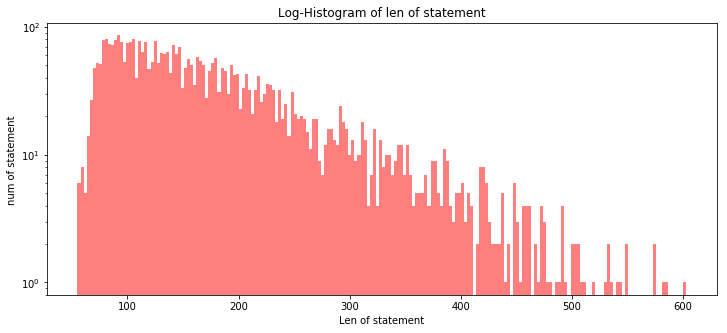

In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

#히스토그램 그리기 
plt.figure(figsize=(12,5))

plt.hist(train_len, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of len of statement')

plt.xlabel('Len of statement')
plt.ylabel('num of statement ')

In [12]:
#통계분석 
print('max of review len: {}'.format(np.max(train_len)))
print('min of review len: {}'.format(np.min(train_len)))
print('mean of review len: {:.2f}'.format(np.mean(train_len)))
print('std of review len: {:.2f}'.format(np.std(train_len)))
print('median of review len: {}'.format(np.median(train_len)))

print('25 percentile of review len: {}'.format(np.percentile(train_len,25)))
print('75 percentile of review len: {}'.format(np.percentile(train_len,75)))

max of review len: 603
min of review len: 55
mean of review len: 175.79
std of review len: 90.49
median of review len: 153.0
25 percentile of review len: 106.0
75 percentile of review len: 219.0


In [13]:
#데이터 패딩
tokenizer = Tokenizer()  #텐서플로우의 전처리 모듈 사용 
tokenizer.fit_on_texts(clean_input)
text_sequences = tokenizer.texts_to_sequences(clean_input)
print(text_sequences[10])  #전처리된 단어들이 모두 데이터프레임 인덱스의 벡터로 구성됨 

[182, 201, 89, 484, 566, 197, 1, 84, 34, 226, 62, 339, 939, 940, 20, 352, 180, 201, 2151, 226, 1965, 1803, 1192, 62, 28, 6, 28, 2711, 724, 3677, 1804, 339, 198, 2152, 725, 1804, 178, 294, 49, 2153, 1126, 750, 226, 604, 4674, 15, 198, 3108, 153, 103, 1251, 1692, 3109, 201, 3110, 750, 94, 3111, 48, 32, 1252, 138]


In [14]:
#단어와 인덱스 사전 확인 
word_vocab = tokenizer.word_index 
word_vocab

{'concrete': 1,
 'material': 2,
 'according': 3,
 'use': 4,
 'millimeters': 5,
 'surface': 6,
 'work': 7,
 'subsection': 8,
 'inch': 9,
 'inches': 10,
 'furnish': 11,
 'least': 12,
 'steel': 13,
 'place': 14,
 'construction': 15,
 'asphalt': 16,
 'percent': 17,
 'approved': 18,
 'aashto': 19,
 'provide': 20,
 'following': 21,
 'within': 22,
 'control': 23,
 'section': 24,
 'type': 25,
 'test': 26,
 'required': 27,
 'water': 28,
 'co': 29,
 'aggregate': 30,
 'per': 31,
 'remove': 32,
 'pavement': 33,
 'equipment': 34,
 'astm': 35,
 'mix': 36,
 'submit': 37,
 'joints': 38,
 'days': 39,
 'grout': 40,
 'may': 41,
 'design': 42,
 'conforming': 43,
 'specified': 44,
 'square': 45,
 'rock': 46,
 'minimum': 47,
 'used': 48,
 'contract': 49,
 'length': 50,
 'using': 51,
 'apply': 52,
 'load': 53,
 'joint': 54,
 'holes': 55,
 'conform': 56,
 'feet': 57,
 'millimeter': 58,
 'manufacturer': 59,
 'production': 60,
 'strength': 61,
 'ground': 62,
 'areas': 63,
 'end': 64,
 'testing': 65,
 'one': 66,

In [15]:
#단어 사전과 전체 단어 개수 저장 

data_configs={}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [16]:
print("전체 단어 개수: ", len(word_vocab))

전체 단어 개수:  6804


* 각 clause 를 모두 단어 인덱스화 한 text_sequences를 전체 트레이닝 데이터의 크기를 168(평균값) 에 맞춰서 앞뒤로 0 패딩해줘야 한다. 

In [17]:
train_inputs = pad_sequences(text_sequences, maxlen=175, padding='post')

print('shape of train data: ', train_inputs.shape)

shape of train data:  (4049, 175)


* 정답을 나타내는 라벨도 넘파이배열로 저장한다. 

In [18]:
train_labels = np.array(input_text['label'])

print('shape of traib labels: ', train_labels.shape)

shape of traib labels:  (4049,)


In [19]:
train_Input_data='train_input.npy'
train_label_data='train_label.npy'
train_clean_data='train_clean.csv'
data_config = 'data_config.json'


np.save(open(dataOutPath+ train_Input_data, 'wb'), train_inputs)
np.save(open(dataOutPath+ train_label_data, 'wb'), train_labels)

clean_input_df.to_csv(dataOutPath+train_clean_data, index=False)

json.dump(data_config, open(dataOutPath+data_config, 'w'), ensure_ascii=False)

여기까지 아직 테스트셋 안만들었음 